In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'..\data\final_train_data.csv')

In [3]:
test = pd.read_csv(r'..\data\final_test_data.csv')

In [4]:
# train['Survived']

In [5]:
train.shape

(891, 41)

In [6]:
test.shape

(418, 40)

## `Splitting into X_train and Y_train and  Scaling`

### Training Data

In [7]:
X= train.drop(labels='Survived',axis=1)

In [8]:
X.shape

(891, 40)

In [9]:
y= train['Survived']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Test Data

In [13]:
scaled_test = scaler.transform(test)

## `Apply Random Forest Model`


In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [15]:
model.feature_importances_

array([0.15790075, 0.17304243, 0.01762219, 0.04918023, 0.01289371,
       0.01774655, 0.0100894 , 0.00515592, 0.00816157, 0.00296223,
       0.00327216, 0.0033338 , 0.09391155, 0.01890465, 0.00944331,
       0.0263167 , 0.01516317, 0.01201857, 0.01515657, 0.00270502,
       0.00872465, 0.03996693, 0.1174394 , 0.03467031, 0.00062079,
       0.0037429 , 0.00782686, 0.00719962, 0.00643428, 0.01418713,
       0.00123825, 0.00158442, 0.03796934, 0.00963002, 0.01628965,
       0.01525224, 0.01160418, 0.00482887, 0.00542337, 0.00038631])

## `Calculate Accuracy`

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.7988826815642458

In [17]:
accuracy_score(y_train,model.predict(scaled_X_train))

0.9901685393258427

In [18]:
confusion_matrix(y_test,y_pred)

array([[88, 11],
       [25, 55]], dtype=int64)

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


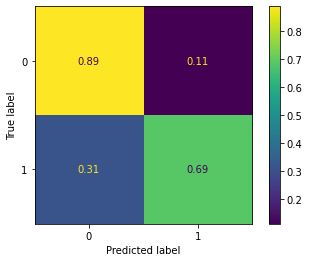

In [19]:
plot_confusion_matrix(model,scaled_X_test,y_test,normalize='true')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.83      0.69      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## `Predicting the Test Data`

In [21]:
test_pred = model.predict(scaled_test)

In [22]:
submission = pd.read_csv(r'..\Kagle_submissions\gender_submission.csv')

In [23]:
submission["Survived"]=test_pred

In [24]:
submission.shape

(418, 2)

In [25]:
submission.to_csv(r"..\Kagle_submissions\Random_forest.csv",index=False)